In [110]:
#Importing the required Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')



In [111]:
#Loading the data file using pandas.
df = pd.read_csv('googleplaystore.csv')

In [112]:
#Understanding the data set
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [114]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [115]:
df.shape

(10841, 13)

In [116]:
df.isna().any()

App               False
Category          False
Rating             True
Reviews           False
Size              False
Installs          False
Type               True
Price             False
Content Rating     True
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool

In [117]:
#No.of null values in each column
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [118]:
#Removing the records containing null values
df=df.dropna()

In [119]:
#No.of null values after removing 
df.isna().sum()


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [120]:
df.isna().any()

App               False
Category          False
Rating            False
Reviews           False
Size              False
Installs          False
Type              False
Price             False
Content Rating    False
Genres            False
Last Updated      False
Current Ver       False
Android Ver       False
dtype: bool

In [121]:
'''Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric.

Extract the numeric value from the column

Multiply the value by 1,000, if size is mentioned in Mb'''
df['Size']= [float(i.split('M')[0])*1000 if 'M' in i else float(i.split('k')[0]) if 'k' in i else float(0) for i in df['Size']]


In [122]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [123]:
'''Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).'''
df['Reviews']=df['Reviews'].astype(float)



In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   float64
 4   Size            9360 non-null   float64
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(3), object(10)
memory usage: 1023.8+ KB


In [125]:
'''Installs field is currently stored as string and has values like 1,000,000+. 

Treat 1,000,000+ as 1,000,000

remove ‘+’, ‘,’ from the field, convert it to integer

'''

df['Installs']= [int(i.replace('+','').replace(',', '')) if '+'  or  ',' in i else int(0) for i in df['Installs']]



In [126]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size              float64
Installs            int64
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [127]:
'''Price field is a string and has $ symbol. Remove ‘$’ sign, and convert it to numeric.'''

df['Price']= [float(i.replace('$','')) if '$' in i else float(0) for i in df['Price']]


In [128]:
df['Price'].astype(int)

0        0
1        0
2        0
3        0
4        0
        ..
10834    0
10836    0
10837    0
10839    0
10840    0
Name: Price, Length: 9360, dtype: int32

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   float64
 4   Size            9360 non-null   float64
 5   Installs        9360 non-null   int64  
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   float64
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 1023.8+ KB


In [130]:
df['Rating']

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10834    4.0
10836    4.5
10837    5.0
10839    4.5
10840    4.5
Name: Rating, Length: 9360, dtype: float64

In [131]:
df.shape

(9360, 13)

In [132]:
'''Average rating should be between 1 and 5 as only these values are allowed on the play store. 
Drop the rows that have a value outside this range.'''


df.drop(df[(df['Rating']<1) & (df['Rating']>5 )].index, inplace =True)

In [133]:
df.shape

(9360, 13)

In [134]:
'''Reviews should not be more than installs as only those who installed can review the app. 
If there are any such records, drop them.'''
df.drop(df[(df['Reviews']) > (df['Installs'])].index,inplace=True)

In [135]:
df.shape

(9353, 13)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9353 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9353 non-null   object 
 1   Category        9353 non-null   object 
 2   Rating          9353 non-null   float64
 3   Reviews         9353 non-null   float64
 4   Size            9353 non-null   float64
 5   Installs        9353 non-null   int64  
 6   Type            9353 non-null   object 
 7   Price           9353 non-null   float64
 8   Content Rating  9353 non-null   object 
 9   Genres          9353 non-null   object 
 10  Last Updated    9353 non-null   object 
 11  Current Ver     9353 non-null   object 
 12  Android Ver     9353 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 1023.0+ KB


In [137]:
'''For free apps (type = “Free”), the price should not be >0. Drop any such rows.'''

df.drop(df[(df['Type']=="Free") & (df['Price'])>0 ].index,inplace=True)


In [138]:
df.shape

(9353, 13)

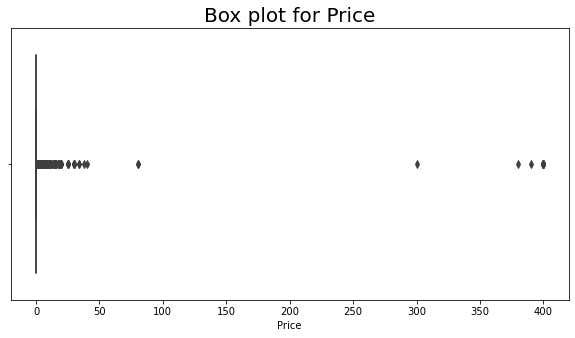

In [139]:
'''Performing univariate analysis: 

Boxplot for Price

'''
plt.figure(figsize=(10,5))
plt.title('Box plot for Price',fontsize=20)
sns.boxplot(df['Price'])

In [140]:
df['Price'].value_counts()

0.00      8711
2.99       114
0.99       105
4.99        70
1.99        59
          ... 
299.99       1
1.59         1
1.61         1
3.90         1
2.90         1
Name: Price, Length: 73, dtype: int64

In [141]:
#df.head()

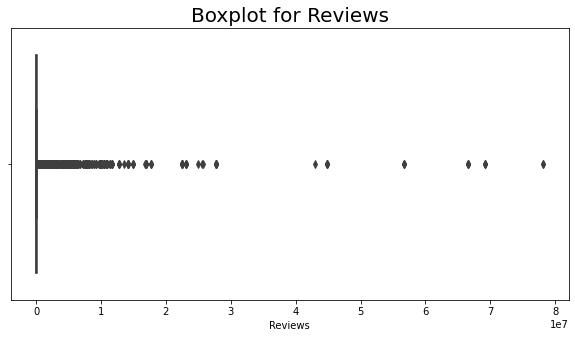

In [142]:
'''Boxplot for Reviews'''
plt.figure(figsize=(10,5))
plt.title('Boxplot for Reviews',fontsize= 20)

sns.boxplot(df['Reviews'])

In [143]:
df['Reviews'].value_counts()

2.0          81
3.0          78
5.0          74
4.0          73
1.0          67
             ..
36490.0       1
768833.0      1
3252896.0     1
260651.0      1
1490732.0     1
Name: Reviews, Length: 5989, dtype: int64

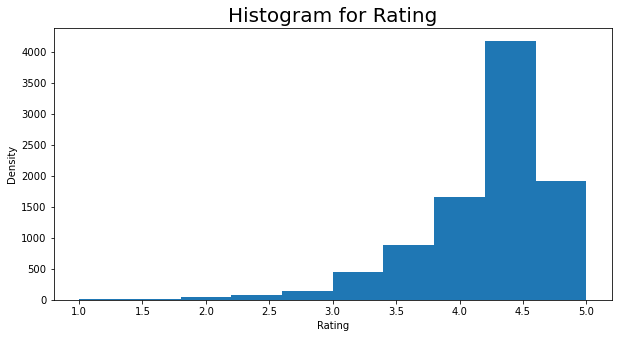

In [144]:
'''Histogram for Rating'''
plt.figure(figsize=(10,5))
plt.title('Histogram for Rating',fontsize= 20)
plt.xlabel('Rating')
plt.ylabel('Density')
plt.hist(df['Rating'])
plt.show()


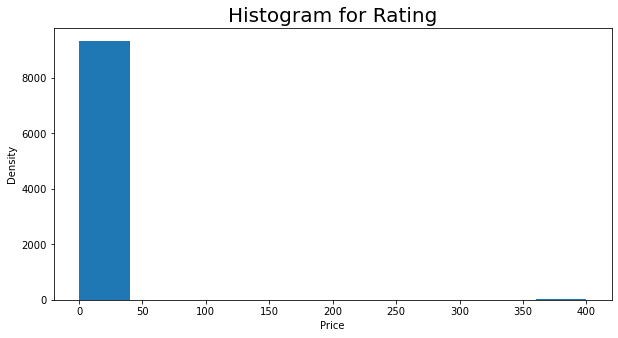

In [145]:
'''Histogram for Price'''
plt.figure(figsize=(10,5))
plt.title('Histogram for Rating',fontsize= 20)
plt.xlabel('Price')
plt.ylabel('Density')
plt.hist(df['Price'])
plt.show()

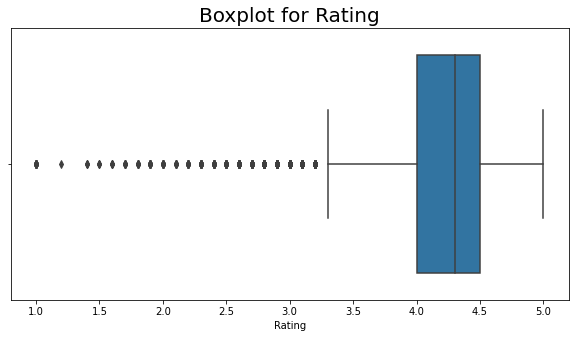

In [146]:
'''Boxplot for Ratings'''
plt.figure(figsize=(10,5))
plt.title('Boxplot for Rating',fontsize= 20)

sns.boxplot(df['Rating'])

In [147]:
'''6. Outlier treatment: 

Price: From the box plot, it seems like there are some apps with very high price. A price of $200 for an application on the Play Store is very high and suspicious!

Check out the records with very high price

Is 200 indeed a high price?

Drop these as most seem to be junk apps'''
m = df.apply(lambda x :True if x['Price']>200 else False,axis=1)
m_count= len(m[m==True].index)




In [148]:
m_count

15

In [149]:
#df.head()

In [150]:
df.shape

(9353, 13)

In [151]:
 df.drop(df[df['Price'] >200].index,inplace=True)

In [152]:
#df.head()

In [153]:
df.shape

(9338, 13)

In [154]:
'''6. Outlier treatment: 
Reviews: Very few apps have very high number of reviews. 
These are all star apps that don’t help with the analysis and, in fact, will skew it. 
Drop records having more than 2 million reviews.'''

'6. Outlier treatment: \nReviews: Very few apps have very high number of reviews. \nThese are all star apps that don’t help with the analysis and, in fact, will skew it. \nDrop records having more than 2 million reviews.'

In [155]:
df['Reviews'].value_counts()


2.0          81
3.0          78
5.0          74
4.0          73
1.0          67
             ..
36490.0       1
768833.0      1
3252896.0     1
260651.0      1
1490722.0     1
Name: Reviews, Length: 5986, dtype: int64

In [156]:
df.drop(df[df['Reviews']>2000000].index,inplace=True)

In [157]:
df.shape

(8885, 13)

In [158]:
'''Installs:  There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis.

Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99

Decide a threshold as cutoff for outlier and drop records having values more than that'''
df.quantile([0.10,0.25,0.50,0.70,0.90,0.95,0.99],axis=0)

,Rating,Reviews,Size,Installs,Price
0.10,3.5,18.00,0.0,1000.0,0.00
0.25,4.0,159.00,2600.0,10000.0,0.00
0.50,4.3,4290.00,9500.0,500000.0,0.00
0.70,4.5,35930.40,23000.0,1000000.0,0.00
0.90,4.7,296771.00,50000.0,10000000.0,0.00
0.95,4.8,637298.00,68000.0,10000000.0,1.99
0.99,5.0,1462800.88,95000.0,100000000.0,7.49


In [159]:
df.shape

(8885, 13)

In [160]:
df.drop(df[df['Installs']>10000000].index,inplace=True)

In [161]:
df.shape

(8496, 13)

In [162]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167.0,5600.0,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


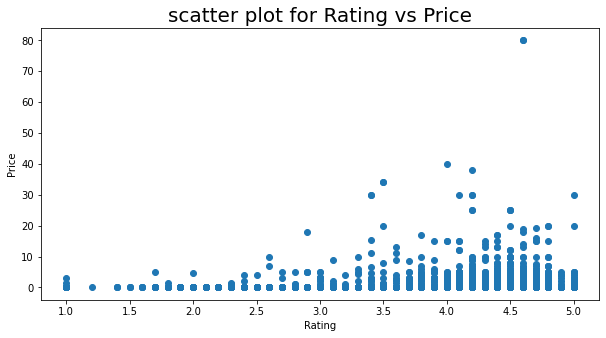

In [163]:
'''7. Bivariate analysis: Let’s look at how the available predictors relate to the variable of interest, i.e., our target variable rating. Make scatter plots (for numeric features) and box plots (for character features) to assess the relations between rating and the other features.

Make scatter plot/joinplot for Rating vs. Price

What pattern do you observe? Does rating increase with price?'''
plt.figure(figsize=(10,5))
plt.title('scatter plot for Rating vs Price',fontsize= 20)
plt.xlabel('Rating')
plt.ylabel('Price')
plt.scatter(x=df['Rating'],y=df['Price'])
plt.show()


Yes, costly are having higher ratings comapred to  less priced apps .
Paid apps have high ratings comapred to free apps.

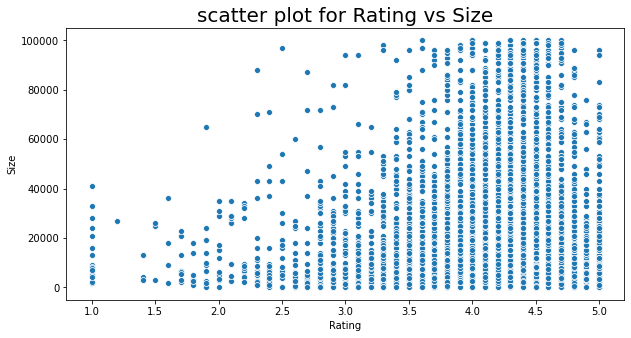

In [164]:
'''Make scatter plot/joinplot for Rating vs. Size

Are heavier apps rated better?'''

plt.figure(figsize=(10,5))
plt.title('scatter plot for Rating vs Size',fontsize= 20)
sns.scatterplot(x='Rating',y='Size',data=df)
plt.show()

Yes it is clear that heavior apps are rated better.

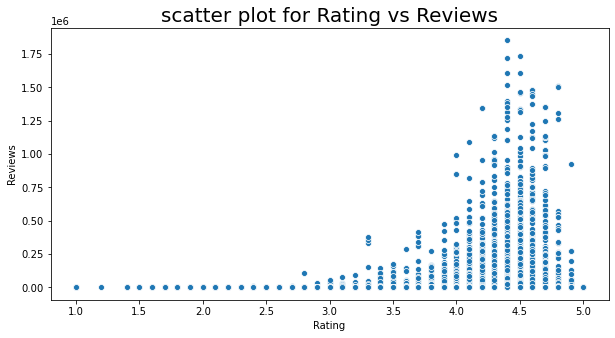

In [165]:
'''Make scatter plot/joinplot for Rating vs. Reviews

Does more review mean a better rating always?'''
plt.figure(figsize=(10,5))
plt.title('scatter plot for Rating vs Reviews',fontsize= 20)
sns.scatterplot(x='Rating',y='Reviews',data=df)
plt.show()


It is  clear that more reviews makes app ratings better.

In [166]:
'''Make boxplot for Rating vs. Content Rating

Is there any difference in the ratings? Are some types liked better?'''

df['Content Rating'].value_counts()

Everyone           6817
Teen                922
Mature 17+          420
Everyone 10+        333
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

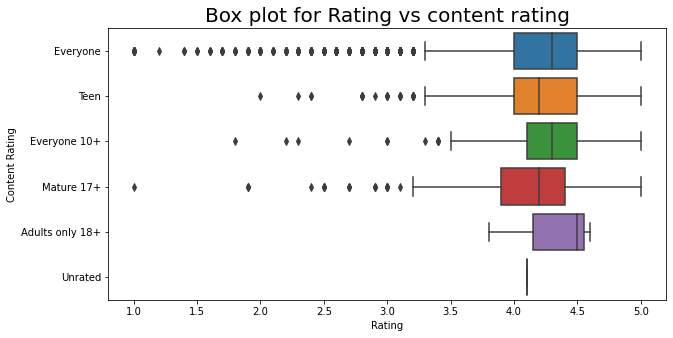

In [167]:

plt.figure(figsize=(10,5))
plt.title('Box plot for Rating vs content rating',fontsize= 20)
sns.boxplot(x='Rating',y='Content Rating',data=df )

Apps which are for everyone has more bad ratings compare to other sections as it has so much outliers value, while 18+ apps have better ratings.

In [168]:
'''Make boxplot for Ratings vs. Category

Which genre has the best ratings?'''

df['Category'].value_counts()

FAMILY                 1663
GAME                    842
TOOLS                   673
MEDICAL                 349
FINANCE                 311
LIFESTYLE               306
SPORTS                  305
BUSINESS                293
PERSONALIZATION         290
HEALTH_AND_FITNESS      290
PRODUCTIVITY            285
PHOTOGRAPHY             248
COMMUNICATION           243
NEWS_AND_MAGAZINES      222
SOCIAL                  213
SHOPPING                208
TRAVEL_AND_LOCAL        205
DATING                  195
BOOKS_AND_REFERENCE     171
EDUCATION               151
VIDEO_PLAYERS           135
ENTERTAINMENT           133
MAPS_AND_NAVIGATION     118
FOOD_AND_DRINK          109
HOUSE_AND_HOME           76
AUTO_AND_VEHICLES        73
WEATHER                  70
LIBRARIES_AND_DEMO       64
ART_AND_DESIGN           60
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

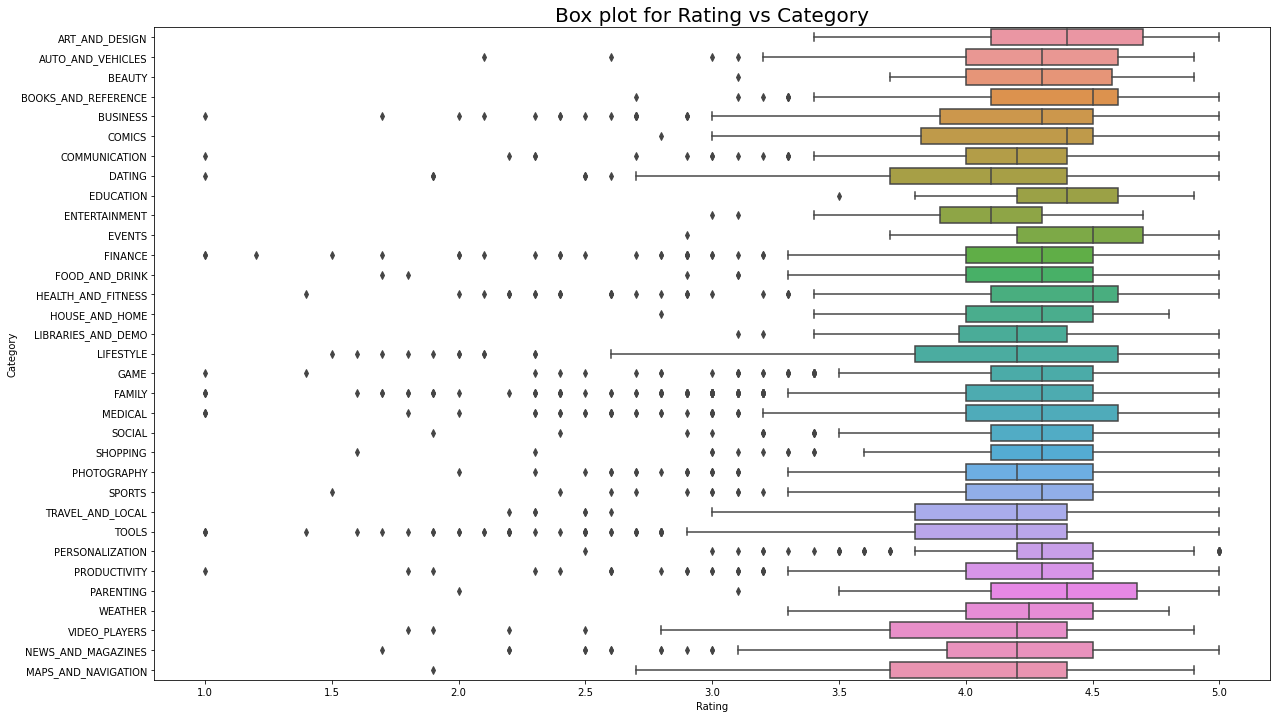

In [169]:

plt.figure(figsize=(20,12))
plt.title('Box plot for Rating vs Category',fontsize= 20)
sns.boxplot(x='Rating',y='Category',data=df )

Events category has best ratings compare to others.



In [170]:
from scipy.stats import skew

In [171]:
skew(df['Installs'])

1.5434248345667814

In [172]:
df.skew()

Rating      -1.749753
Reviews      4.576494
Size         1.657766
Installs     1.543697
Price       16.264811
dtype: float64

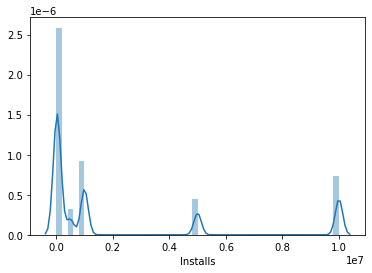

In [173]:
sns.distplot(df['Installs'])

8. Data preprocessing

For the steps below, create a copy of the dataframe to make all the edits. Name it inp1.

1.Reviews and Install have some values that are still relatively very high. Before building a linear regression model, you need to reduce the skew. Apply log transformation (np.log1p) to Reviews and Installs.

2.Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.

3.Get dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not understand categorical data, and all data should be numeric. Dummy encoding is one way to convert character fields to numeric. Name of dataframe should be inp2.

8.1

In [174]:
inp1 = df

In [175]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167.0,5600.0,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


In [176]:
installs_skew= np.log1p(inp1['Installs'])

In [177]:
inp1['Installs'] = installs_skew

In [178]:
skew(inp1['Installs'])

-0.5096386553957499

In [179]:
skew(inp1['Reviews'])

4.575685937471797

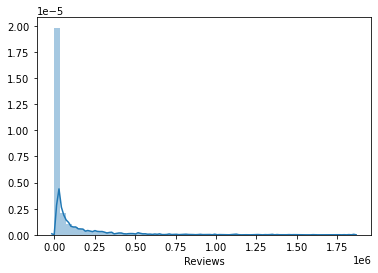

In [180]:
sns.distplot(inp1['Reviews'])

In [181]:
review_skew = np.log1p(inp1['Reviews'])

In [182]:
inp1['Reviews'] = review_skew

In [183]:
skew(inp1['Reviews'])

-0.20036411359025222

8.2

In [184]:
inp1.drop(['App','Last Updated','Current Ver','Android Ver','Type'],axis =1,inplace =True)

In [185]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8496 entries, 0 to 10840
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        8496 non-null   object 
 1   Rating          8496 non-null   float64
 2   Reviews         8496 non-null   float64
 3   Size            8496 non-null   float64
 4   Installs        8496 non-null   float64
 5   Price           8496 non-null   float64
 6   Content Rating  8496 non-null   object 
 7   Genres          8496 non-null   object 
dtypes: float64(5), object(3)
memory usage: 917.4+ KB


In [186]:
inp1.shape

(8496, 8)

8.3

In [187]:
inp2 = inp1

In [188]:
inp2.head()

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,11.379520,8700.0,15.424949,0.0,Everyone,Art & Design
4,ART_AND_DESIGN,4.3,6.875232,2800.0,11.512935,0.0,Everyone,Art & Design;Creativity
5,ART_AND_DESIGN,4.4,5.123964,5600.0,10.819798,0.0,Everyone,Art & Design


Applying Dummy Encoding on Category feature


In [189]:
inp2['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [190]:
inp2.Category = pd.Categorical(inp2.Category)

In [191]:
X= inp2[['Category']]
del inp2['Category']


In [192]:
dummies = pd.get_dummies(X,prefix= 'Category')
inp2 = pd.concat([inp2,dummies], axis=1)


In [193]:
inp2.head()


,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,4.1,5.075174,19000.0,9.210440,0.0,Everyone,Art & Design,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,6.875232,14000.0,13.122365,0.0,Everyone,Art & Design;Pretend Play,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,11.379520,8700.0,15.424949,0.0,Everyone,Art & Design,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,6.875232,2800.0,11.512935,0.0,Everyone,Art & Design;Creativity,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4.4,5.123964,5600.0,10.819798,0.0,Everyone,Art & Design,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [194]:
inp2.shape

(8496, 40)

Applying Dummy Encoding on Content rating feature

In [195]:
inp2['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [196]:
inp2['Content Rating'] = pd.Categorical(inp2['Content Rating'])

x = inp2[['Content Rating']]
del inp2['Content Rating']

dummies = pd.get_dummies(x,prefix='Content Rating')
inp2  = pd.concat([inp2,dummies],axis=1)
inp2.shape

(8496, 45)

In [197]:
inp2.head()

,Rating,Reviews,Size,Installs,Price,Genres,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,...,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,4.1,5.075174,19000.0,9.210440,0.0,Art & Design,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3.9,6.875232,14000.0,13.122365,0.0,Art & Design;Pretend Play,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,4.7,11.379520,8700.0,15.424949,0.0,Art & Design,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,4.3,6.875232,2800.0,11.512935,0.0,Art & Design;Creativity,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,4.4,5.123964,5600.0,10.819798,0.0,Art & Design,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


Dummy Encoding for Genres Feature

In [198]:
inp2['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education', 'Education;Creativity',
       'Education;Education', 'Education;Music & Video',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Brain Games', 'Entertainment;Creativity',
       'Entertainment;Music & Video', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play', 'Card', 'Casual', 'Puzzle',
       'Action', 'Arcade', 'Word', 'Racing', 'Casual;Creativity',
       'Sports', 'Board', 'Simulation', 'Role Playing', 'Adventure',
       'Strategy', 'Simulation;Education', 'Action;Action & Adventure',
       'Trivia', 'Casual;Brain Games', 'Simulation;Action & Adventure',
       'Education

Since, There are too many categories under Genres. Hence, we will try to reduce some categories which have very few samples under them and put them under one new common category i.e. "Other".

In [199]:
lists = []
for i in inp2.Genres.value_counts().index:
    if inp2.Genres.value_counts()[i]<20:
        lists.append(i)
inp2.Genres = ['Other' if i in lists else i for i in inp2.Genres] 

In [200]:
inp2["Genres"].unique()

array(['Art & Design', 'Other', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Communication',
       'Dating', 'Education', 'Education;Education',
       'Education;Pretend Play', 'Entertainment',
       'Entertainment;Music & Video', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Card', 'Casual', 'Puzzle', 'Action', 'Arcade',
       'Word', 'Racing', 'Sports', 'Board', 'Simulation', 'Role Playing',
       'Adventure', 'Strategy', 'Trivia', 'Educational;Education',
       'Casual;Pretend Play', 'Medical', 'Social', 'Shopping',
       'Photography', 'Travel & Local', 'Tools', 'Personalization',
       'Productivity', 'Parenting', 'Weather', 'Video Players & Editors',
       'News & Magazines', 'Maps & Navigation', 'Educational', 'Casino'],
      dtype=object)

In [201]:
inp2['Genres'] = pd.Categorical(inp2['Genres'])
x= inp2[['Genres']]
del inp2['Genres']

dummies = pd.get_dummies(x,prefix='Genres')
inp2 = pd.concat([inp2,dummies],axis=1)
inp2.shape

(8496, 96)

9. Train test split  and apply 70-30 split. 
10. Separate the dataframes into X_train, y_train, X_test, and y_test.



In [202]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [203]:
data = inp2

In [204]:
data.head()

,Rating,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Genres_Simulation,Genres_Social,Genres_Sports,Genres_Strategy,Genres_Tools,Genres_Travel & Local,Genres_Trivia,Genres_Video Players & Editors,Genres_Weather,Genres_Word
0,4.1,5.075174,19000.0,9.210440,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,6.875232,14000.0,13.122365,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,11.379520,8700.0,15.424949,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,6.875232,2800.0,11.512935,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4.4,5.123964,5600.0,10.819798,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [205]:
data.shape

(8496, 96)

In [206]:
X= data.drop(['Rating'],axis=1)
y= data['Rating']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.3,random_state=1)


In [207]:
X_train.shape

(5947, 95)

In [208]:
X_test.shape

(2549, 95)

In [209]:
y_train.shape

(5947,)

In [210]:
y.head()

0    4.1
1    3.9
2    4.7
4    4.3
5    4.4
Name: Rating, dtype: float64

In [211]:
X.head()

,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Genres_Simulation,Genres_Social,Genres_Sports,Genres_Strategy,Genres_Tools,Genres_Travel & Local,Genres_Trivia,Genres_Video Players & Editors,Genres_Weather,Genres_Word
0,5.075174,19000.0,9.210440,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6.875232,14000.0,13.122365,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,11.379520,8700.0,15.424949,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6.875232,2800.0,11.512935,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5.123964,5600.0,10.819798,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


11 . Model building

Use linear regression as the technique



In [212]:
model = LinearRegression()

In [213]:
model.fit(X_train,y_train)

LinearRegression()

In [214]:
y_pred = model.predict(X_test)


Report the R2 on the train set

In [215]:
model.score(X_train,y_train)

0.16153072277729819

In [216]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
r2

0.1312154525142477

In [217]:
r2 = r2_score(y_test,y_pred)
r2

0.1312154525142477

In [218]:
model.score(X_test,y_test)*100

13.12154525142477